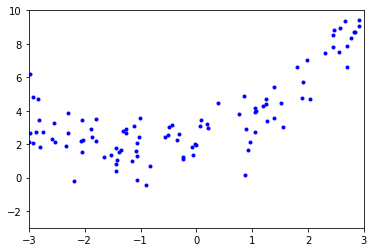

In [10]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


import matplotlib.pyplot as plt

plt.figure()
plt.plot(X, y, "b.")
plt.axis([-3, 3, -3, 10])
plt.show()

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.90277816])

In [14]:
X_poly[0]

array([1.90277816, 3.62056472])

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.20239525]), array([[0.97952828, 0.47606506]]))

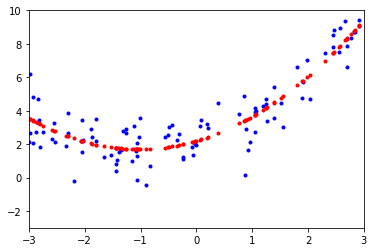

In [28]:
plt.figure()
plt.plot(X, y, "b.")
plt.plot(X, lin_reg.coef_[0][1]* X**2 + lin_reg.coef_[0][0]* X + lin_reg.intercept_, "r.")
plt.axis([-3, 3, -3, 10])
plt.show()

In [45]:
# 学习曲线

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.axis([0,80,0,5])

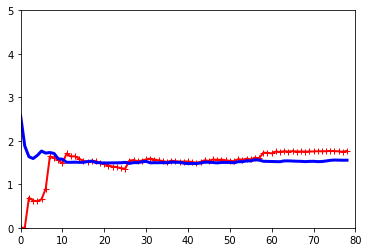

In [46]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

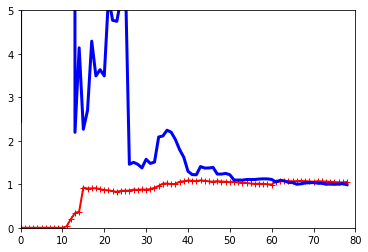

In [47]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression())
))

plot_learning_curves(polynomial_regression, X, y)

In [54]:
# 岭回归
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.13867217]])

In [53]:
# 随机梯度下降 + l2范数
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=100, tol=1, penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

#sgd_reg.intercept_, sgd_reg.coef_

array([4.53419243])

In [55]:
# 套索回归
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.09050509])

In [56]:
#弹性网络
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.09333789])

In [ ]:
# 早期停止法

from sklearn.base import clone
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                      learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.pridict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_preditc, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [66]:
# 逻辑回归

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
# list(iris['data'])

[array([5.1, 3.5, 1.4, 0.2]),
 array([4.9, 3. , 1.4, 0.2]),
 array([4.7, 3.2, 1.3, 0.2]),
 array([4.6, 3.1, 1.5, 0.2]),
 array([5. , 3.6, 1.4, 0.2]),
 array([5.4, 3.9, 1.7, 0.4]),
 array([4.6, 3.4, 1.4, 0.3]),
 array([5. , 3.4, 1.5, 0.2]),
 array([4.4, 2.9, 1.4, 0.2]),
 array([4.9, 3.1, 1.5, 0.1]),
 array([5.4, 3.7, 1.5, 0.2]),
 array([4.8, 3.4, 1.6, 0.2]),
 array([4.8, 3. , 1.4, 0.1]),
 array([4.3, 3. , 1.1, 0.1]),
 array([5.8, 4. , 1.2, 0.2]),
 array([5.7, 4.4, 1.5, 0.4]),
 array([5.4, 3.9, 1.3, 0.4]),
 array([5.1, 3.5, 1.4, 0.3]),
 array([5.7, 3.8, 1.7, 0.3]),
 array([5.1, 3.8, 1.5, 0.3]),
 array([5.4, 3.4, 1.7, 0.2]),
 array([5.1, 3.7, 1.5, 0.4]),
 array([4.6, 3.6, 1. , 0.2]),
 array([5.1, 3.3, 1.7, 0.5]),
 array([4.8, 3.4, 1.9, 0.2]),
 array([5. , 3. , 1.6, 0.2]),
 array([5. , 3.4, 1.6, 0.4]),
 array([5.2, 3.5, 1.5, 0.2]),
 array([5.2, 3.4, 1.4, 0.2]),
 array([4.7, 3.2, 1.6, 0.2]),
 array([4.8, 3.1, 1.6, 0.2]),
 array([5.4, 3.4, 1.5, 0.4]),
 array([5.2, 4.1, 1.5, 0.1]),
 array([5.

In [70]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)
# X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

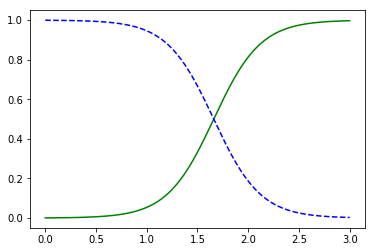

In [71]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], 'b--', label="Not Iris-Virginica")

In [80]:
log_reg.predict([[1.7], [1.66]])

array([1, 0])

In [83]:
# 多元逻辑回归

X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])